Carrying capacity is the maximum population size that an environment can support indefinitely. It's like the largest number of organisms that can live in a certain place without causing issues.

The equation $$N_t = \frac{K}{1 + e^{a - rt}}$$ represents how a population grows over time. This is known as the integral form.

The equation $$\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)$$ explains how a population changes over time. This is called the differential form.

In these equations, $N$ stands for the number of organisms, $r$ is the rate at which the population grows when there's no competition for resources, $t$ is time, and $a$ is a constant of integration defining the position of the curve relative to the origin.

In the second equation, the part inside the brackets indicates the potential for growth. When the population is small, this value is close to $1$, leading to rapid growth. As the population approaches the carrying capacity $K$, this value decreases towards $0$, causing growth to slow down. When the population reaches $K$, growth stops because the unused growth potential becomes $0$. This means that the population ceases to grow when it reaches its carrying capacity.


$$
\begin{aligned}
\dfrac{dS_J}{dt} &= \nu(S_A + R_A +(1-\rho) (I_A + C_A)) - (\beta_{JA}I_A + \beta_{JJ}I{_J} + \beta_CC)S_J - \tau_JS_J - \mu_{J} S_{J},\\    
 \dfrac{dC_J}{dt} &= \nu(\rho (I_A + C_A)) - \tau_JC_J - \theta\mu_J{C_J},\\
 \dfrac{dI_J}{dt} &= (\beta_{JA}I_A + \beta_{JJ}I_J + \beta_CC)S_J -\tau_JI_J - \gamma_JI_J - \mu_JI_J,\\
 \dfrac{dR_J}{dt} &= \gamma_{J} I_{J} - \tau_{J} R_{J} - \mu_{J}R_{J},\\
\dfrac{dS_A}{dt} &= \tau_J S_J - (\beta_{AA}I_A + \beta_{AJ}I_J + \beta_CC)S_A - \mu_AS_A,\\
\dfrac{dC_A}{dt} &= \tau_J C_J - \theta\mu_AC_A,\\
\dfrac{dI_A}{dt} &= (\beta_{AA}I_A + \beta_{AJ}I_J + \beta_CC)S_A - \gamma_AI_A - \mu_AI_A,\\
 \dfrac{dR_A}{dt} &= \gamma_AI_A +\tau_JR_J - \mu_AR_A,
\end{aligned}
$$

$$\frac{dN}{dt} = \nu N \left(1 - \frac{N}{K}\right)$$

In [1]:
# import numpy as np
# from scipy import integrate
# from scipy.integrate import odeint,solve_ivp
# import sympy as sm
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [12, 6] #[W,H]

# K= 1000 # Carrying capacity

# # Model parameters
# alpha0=2.77/30 #5.12 #0.02
# #alpha0=2.77/1000 #5.12 #0.02
# #alpha1=0.1
# k=4.51/30 # 55.60
# s=31.02 #26.04
# varphi=0.58
# Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
# Bja=1.45e-3
# Baa=1.45e-3
# Bc=(1.45e-3)/2
# rho=0.1
# theta=1.05
# Tj=0.041666666666666664 #0.0166(our Cal) #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# # The age at first litter can be regarded as 94 days


# mu_j= 0.0028 #0.007/7  #0.0028#0.01666666666#2.31e-3 # 0.1
# mu_a= 0.0037 #0.007/7  #0.0037#1/(50) #0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
# #the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428


# # mu_j_0 = 0.007/7
# # mu_a_0 = 0.007/7


# gamma_j=0.0457
# gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
# q = 0

# ###### Time of integration ##################

# t =np.arange(1.0, 365.0*3, 1)

# # Model equations
# def model(t,X):

#     Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
#     N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
#     #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p

#     nu =alpha0+k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2))
#     #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
#     #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
#     ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
#     The np.where() function takes two arguments: a condition and a value to return if the condition is true,
#     and a value to return if the condition is false. Here we use the np.where() function to return 0
#     if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
#     #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


#     dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
#     #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


#     dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Rj * (N/(K)) #* (1-N/K)#* N/K


#     dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

#     dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

#     dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

#     dIadt = ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

#     dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

#     dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

#     #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
#     return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]


# Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = 500,10,0,0,200,20,0,0
# initial=[Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra]#, Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra]

# X = odeint(model, initial, t, tfirst=True)


# plt.rcParams['figure.figsize'] = [18, 13] #[W,H]
# plt.style.use('ggplot')
# fig = plt.figure()
# ax = fig.add_subplot(2, 2, 1)
# ax.plot(t, X[:, 0], '-', label='Sj')
# ax.plot(t, X[:, 1], '-', label='Ij')
# ax.plot(t, X[:, 2], '-', label='Cj')
# ax.plot(t, X[:, 3], '-', label='Rj')
# ax.set_title("juvenile")
# ax.legend(loc='best')
# plt.xlabel('T')
# #plt.ylim(-10,200)
# ax = fig.add_subplot(2, 2, 2)
# ax.plot(t, X[:,4], '-', label='Sa')
# ax.plot(t, X[:, 5], '-', label='Ia')
# ax.plot(t, X[:, 6], '-', label='Ca')
# ax.plot(t, X[:, 7], '-', label='Ra')
# ax.legend(loc='best')
# ax.set_title("adult")

# ax = fig.add_subplot(2, 2, 3)
# ax.plot(t, X[:, 0]+X[:, 1]+X[:, 2]+X[:, 3], '-k', label='Nj')
# #ax.plot(t, X[:,8], '-', label='N')
# ax.set_title("N juvenile")
# ax.legend(loc='best')
# plt.xlabel('T')

# ax = fig.add_subplot(2, 2, 4)
# ax.plot(t, X[:, 4]+X[:, 5]+X[:, 6]+X[:, 7], '-k', label='Na')
# #ax.plot(t, X[:,8], '-', label='N from Carrying capacity')
# ax.set_title("N adult")
# ax.legend(loc='best')
# plt.xlabel('T')




In [2]:
# X = odeint(model, initial, t, tfirst=True)

# # Plotting
# plt.rcParams['figure.figsize'] = [18, 13]
# plt.style.use('ggplot')
# fig, axes = plt.subplots(2, 2)

# labels = ['Sj', 'Ij', 'Cj', 'Rj', 'Sa', 'Ia', 'Ca', 'Ra']
# for i, ax in enumerate(axes.flat):
#     ax.plot(t, X[:, i], '-', label=labels[i])
#     ax.set_title(labels[i])
#     ax.legend(loc='best')
#     plt.xlabel('T')

# plt.tight_layout()
# plt.show()

NameError: name 'odeint' is not defined

/tmp/ipykernel_4683/1469501045.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10').colors


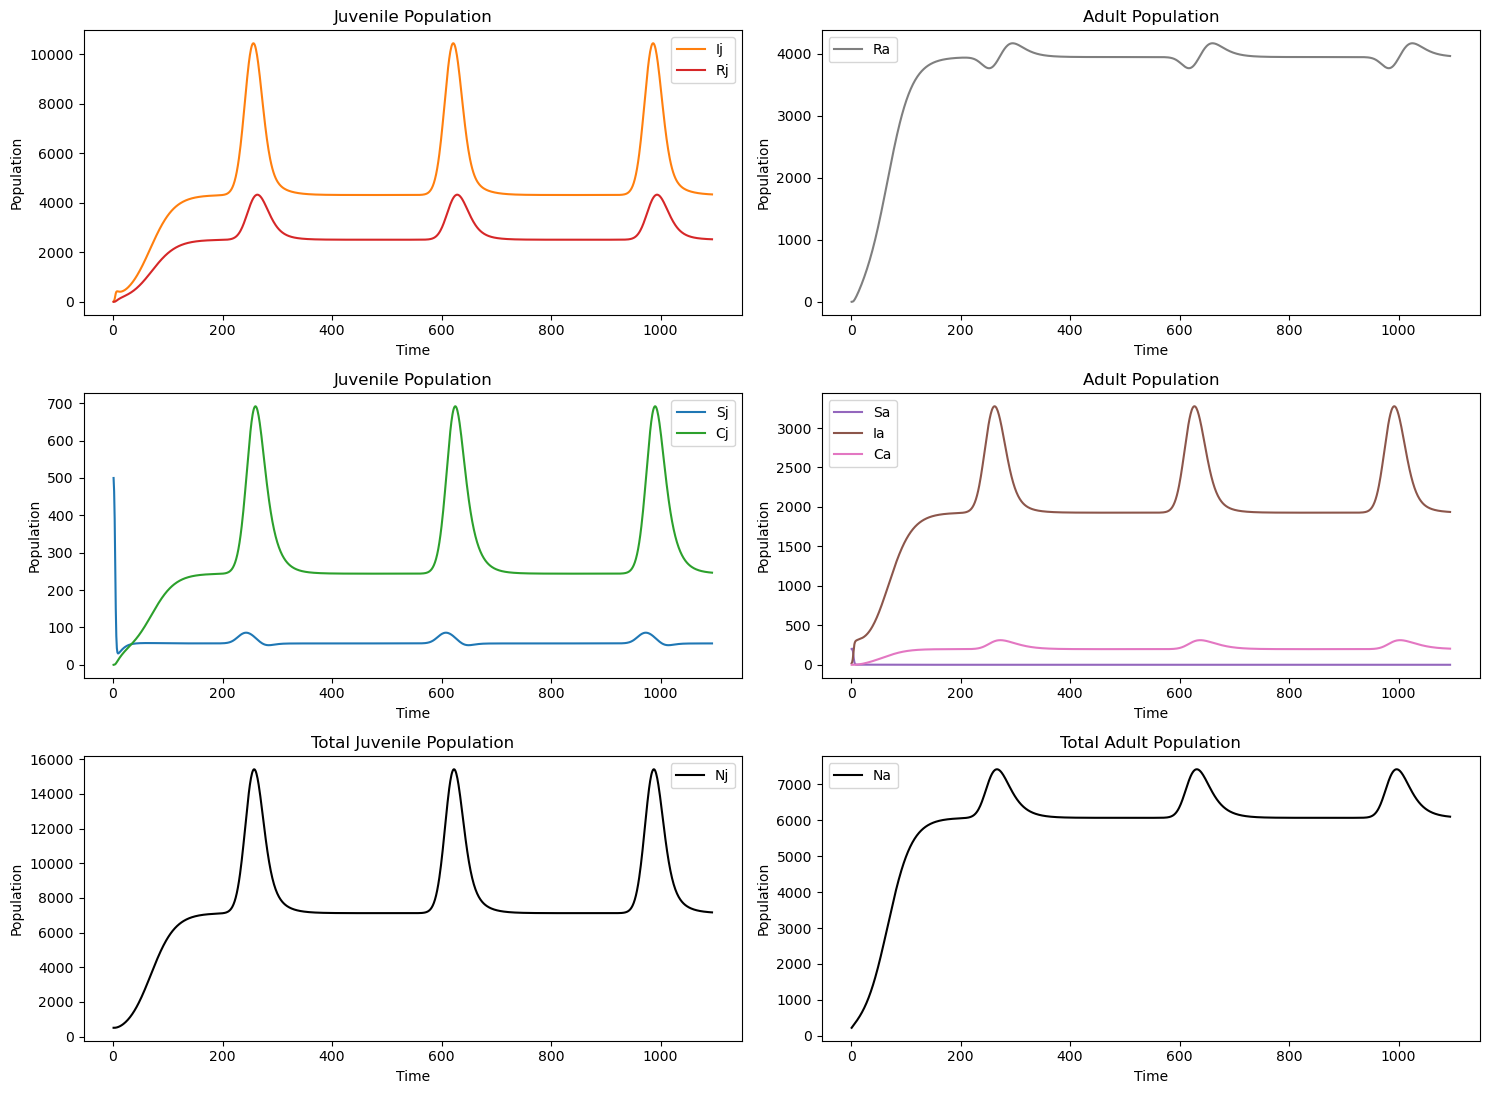

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = 1.45e-3 / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664
mu_j = 0.0028
mu_a = 0.0037
gamma_j = 0.0457
gamma_a = 0.0457
q = 0
t = np.arange(1.0, 365.0 * 3, 1)

# Birth pulse
def calculate_nu(t):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * t / 365 - varphi) ** 2))

# Model equations
def model(X, t):
    # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Initial conditions
initial = [500, 10, 0, 0, 200, 20, 0, 0]
X = odeint(model, initial, t)

# Custom color palette
colors = plt.cm.get_cmap('tab10').colors

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
#fig.suptitle('Population Dynamics', fontsize=16)

# Juvenile subplot
ax = axes[0, 0]
#ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 1], '-', color=colors[1], label='Ij')
#ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')
ax.plot(t, X[:, 3], '-', color=colors[3], label='Rj')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[0, 1]
#ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
#ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
#ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')
ax.plot(t, X[:, 7], '-', color=colors[7], label='Ra')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Juvenile subplot
ax = axes[1, 0]
ax.plot(t, X[:, 0], '-', color=colors[0], label='Sj')
ax.plot(t, X[:, 2], '-', color=colors[2], label='Cj')
ax.set_title('Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adult subplot
ax = axes[1, 1]
ax.plot(t, X[:, 4], '-', color=colors[4], label='Sa')
ax.plot(t, X[:, 5], '-', color=colors[5], label='Ia')
ax.plot(t, X[:, 6], '-', color=colors[6], label='Ca')
ax.set_title('Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Juvenile Population subplot
ax = axes[2, 0]
ax.plot(t, np.sum(X[:, :4], axis=1), '-k', label='Nj')
ax.set_title('Total Juvenile Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Total Adult Population subplot
ax = axes[2, 1]
ax.plot(t, np.sum(X[:, 4:8], axis=1), '-k', label='Na')
ax.set_title('Total Adult Population')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint,solve_ivp
import sympy as sm
import matplotlib.pyplot as plt

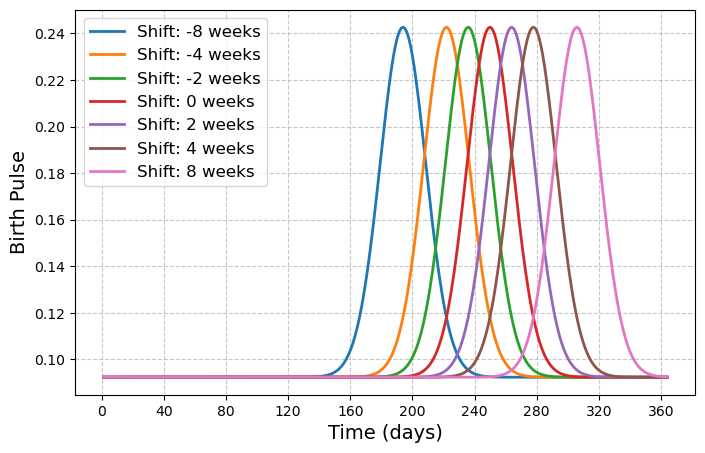

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Constants
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = 1.45e-3 / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664
mu_j = 0.0028
mu_a = 0.0037
gamma_j = 0.0457
gamma_a = 0.0457
q = 0

# Function to calculate nu(t) for a given shift, s, and k
def calculate_nu(t, shift_weeks=0):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))

# Create an array of shift values in weeks (both positive and negative)
shifts_weeks = [-8, -4, -2, 0, 2, 4, 8]

# Define time range for one year (365 days)
t_one_year = np.arange(1.0, 365.0, 1)

# Set up a clean and elegant plot
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate and plot birth pulses for each shift
for shift in shifts_weeks:
    nu_values = [calculate_nu(t_day, shift) for t_day in t_one_year]
    ax.plot(t_one_year, nu_values, label=f'Shift: {shift} weeks', linewidth=2)

# Set axis labels and title
ax.set_xlabel('Time (days)', fontsize=14)
ax.set_ylabel('Birth Pulse', fontsize=14)
#ax.set_title('Shifting Seasonal Peak Births', fontsize=16)

# Set legend and adjust its location
ax.legend(fontsize=12, loc='best')

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to be more informative
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Save the plot in a publication-quality format (PDF) with 300 DPI
plt.savefig('Shifting_Seasonal_Peak_Births.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Experiment involving variations in the width of the birth pulse timing

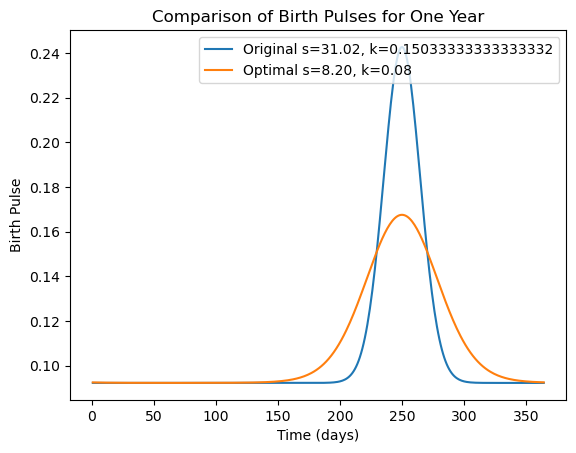

Integral for Original s=31.02, k=0.15033333333333332: 39.121975675185794
Integral for Optimal s=8.20, k=0.08: 39.12197567677938


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.optimize import minimize

# Function to calculate nu(t) for a given shift, s, and k
def calculate_nu(t, s, k, shift_weeks=0):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))

# Define time range for one year (365 days)
t_one_year = np.arange(1.0, 365.0, 1)

# Initialize parameters
alpha0 = 2.77 / 30
varphi = 0.58
s_original = 31.02  # Initial value of s
k_original = 4.51 / 30  # Initial value of k

# Desired value of s
s_desired = s_original*1/4 # 15.51

# Calculate the integral of the original curve
nu_values_original = [calculate_nu(t_day, s_original, k_original) for t_day in t_one_year]
integral_original = trapz(nu_values_original, t_one_year)

# Function to minimize the difference in integral
def integral_difference(params):
    s, k = params
    nu_values = [calculate_nu(t_day, s, k) for t_day in t_one_year]
    integral = trapz(nu_values, t_one_year)
    return abs(integral - integral_original)

# Perform optimization to find the parameters that maintain the integral
result = minimize(integral_difference, [s_desired, k_original], bounds=((0.01, 100), (0.01, 10)))

s_optimal, k_optimal = result.x

# Calculate and plot the original and new birth pulses with the optimized s and k
nu_values_new = [calculate_nu(t_day, s_optimal, k_optimal) for t_day in t_one_year]

plt.plot(t_one_year, nu_values_original, label=f'Original s={s_original}, k={k_original}')
plt.plot(t_one_year, nu_values_new, label=f'Optimal s={s_optimal:.2f}, k={k_optimal:.2f}')

plt.legend()
plt.title('Comparison of Birth Pulses for One Year')
plt.xlabel('Time (days)')
plt.ylabel('Birth Pulse')
plt.show()

print(f'Integral for Original s={s_original}, k={k_original}: {integral_original}')
print(f'Integral for Optimal s={s_optimal:.2f}, k={k_optimal:.2f}: {trapz(nu_values_new, t_one_year)}')


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.optimize import minimize
import pandas as pd

# Function to calculate nu(t) for a given shift, s, and k
def calculate_nu(t, s, k, shift_weeks=0):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))

# Define time range for one year (365 days)
t_one_year = np.arange(1.0, 366.0, 1)

# Initialize parameters
alpha0 = 2.77 / 30
varphi = 0.58
s_original = 31.02  # Initial value of s
k_original = 4.51 / 30  # Initial value of k

# Generate a range of s_desired values from s_original*1/4 to s_original*2
s_desired_values = np.linspace(s_original*1/4, s_original*2, num=20)

# Create an empty list to store results
results = []
# Calculate the integral of the original curve
nu_values_original = [calculate_nu(t_day, s_original, k_original) for t_day in t_one_year]
integral_original = trapz(nu_values_original, t_one_year)
print(f'Integral for Original s={s_original}, k={k_original}: {integral_original}')

# Loop through each s_desired value, optimize, and store results
for s_desired in s_desired_values:
    # Calculate the integral of the original curve
    nu_values_original = [calculate_nu(t_day, s_original, k_original) for t_day in t_one_year]
    integral_original = trapz(nu_values_original, t_one_year)

    # Function to minimize the difference in integral
    def integral_difference(params):
        s, k = params
        nu_values = [calculate_nu(t_day, s, k) for t_day in t_one_year]
        integral = trapz(nu_values, t_one_year)
        return abs(integral - integral_original)

    # Perform optimization to find the parameters that maintain the integral
    result = minimize(integral_difference, [s_desired, k_original], bounds=((0.01, 100), (0.01, 10)))

    s_optimal, k_optimal = result.x

    # Calculate and plot the original and new birth pulses with the optimized s and k
    nu_values_new = [calculate_nu(t_day, s_optimal, k_optimal) for t_day in t_one_year]

    # Append the results to the list
    results.append({'s_desired': s_desired, 'k_optimal': k_optimal, 'integral_optimal': trapz(nu_values_new, t_one_year)})

# Create a pandas dataframe from the results list
results_df = pd.DataFrame(results)

# Print the dataframe with results
print(results_df)
s_list = list(results_df['s_desired'])
k_list = list(results_df['k_optimal'])

Integral for Original s=31.02, k=0.15033333333333332: 39.21430900858337
    s_desired  k_optimal  integral_optimal
0    7.755000   0.075211         39.214309
1   10.612105   0.087292         39.214309
2   13.469211   0.098360         39.214309
3   16.326316   0.108440         39.214309
4   19.183421   0.117719         39.214309
5   22.040526   0.126346         39.214309
6   24.897632   0.134435         39.214309
7   27.754737   0.142073         39.214309
8   30.611842   0.149325         39.214309
9   33.468947   0.156253         39.214309
10  36.326053   0.162888         39.214309
11  39.183158   0.169262         39.214309
12  42.040263   0.175404         39.214309
13  44.897368   0.181339         39.214309
14  47.754474   0.187085         39.214309
15  50.611579   0.192660         39.214309
16  53.468684   0.198077         39.214309
17  56.325789   0.203351         39.214309
18  59.182895   0.208491         39.214309
19  62.040000   0.213507         39.214309


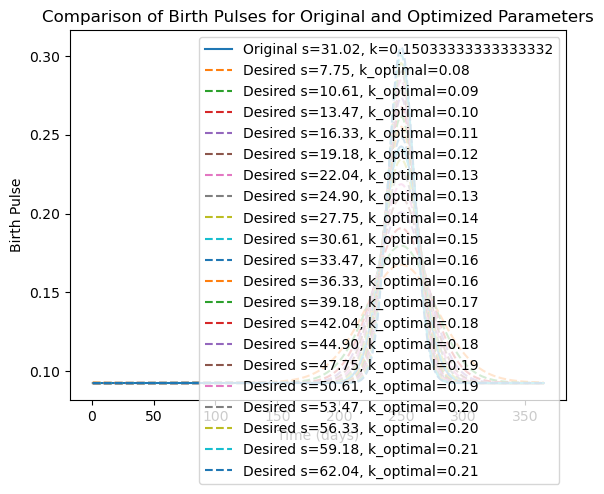

In [8]:
# Calculate and plot the original birth pulse with s=31.02 and k=0.15033333333333332
nu_values_original = [calculate_nu(t_day, s_original, k_original) for t_day in t_one_year]

plt.plot(t_one_year, nu_values_original, label=f'Original s={s_original}, k={k_original}')

# Loop through the optimized results and plot each s_desired and k_optimal
for i, row in results_df.iterrows():
    s_desired = row['s_desired']
    k_optimal = row['k_optimal']
    
    nu_values_new = [calculate_nu(t_day, s_desired, k_optimal) for t_day in t_one_year]
    
    plt.plot(t_one_year, nu_values_new, label=f'Desired s={s_desired:.2f}, k_optimal={k_optimal:.2f}', linestyle='dashed')

plt.legend()
plt.title('Comparison of Birth Pulses for Original and Optimized Parameters')
plt.xlabel('Time (days)')
plt.ylabel('Birth Pulse')
plt.show()


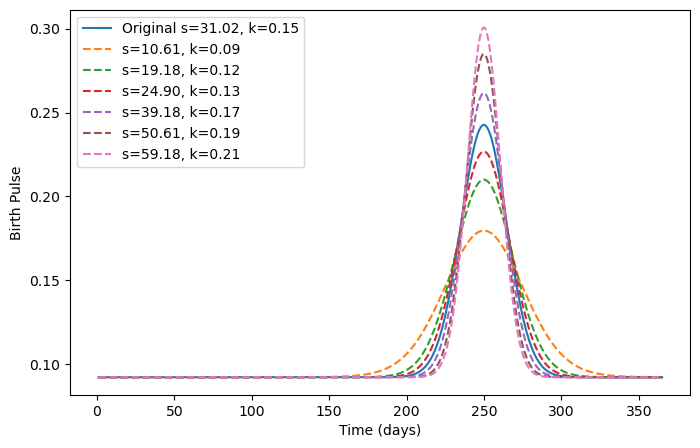

In [9]:
# Calculate and plot the original birth pulse with s=31.02 and k=0.15033333333333332
nu_values_original = [calculate_nu(t_day, s_original, k_original) for t_day in t_one_year]

# Set the plot size
plt.figure(figsize=(8, 5))

plt.plot(t_one_year, nu_values_original, label=f'Original s={s_original}, k={k_original:.2f}')

# Select specific lines from results_df based on the specified indices
selected_indices = [1, 4, 6, 11, 15, 18]
selected_lines = results_df.loc[selected_indices]

# Loop through the selected lines and plot each s_desired and k_optimal
for i, row in selected_lines.iterrows():
    s_desired = row['s_desired']
    k_optimal = row['k_optimal']
    
    nu_values_new = [calculate_nu(t_day, s_desired, k_optimal) for t_day in t_one_year]
    
    # Plot the results
    plt.plot(t_one_year, nu_values_new, label=f's={s_desired:.2f}, k={k_optimal:.2f}', linestyle='dashed')

plt.legend()
#plt.title('Comparison of Birth Pulses for Original and Selected Desired Parameters')
plt.xlabel('Time (days)')
plt.ylabel('Birth Pulse')
# Save the plot
plt.savefig('variations_in_width_birth_pulse_timing.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd  # Import Pandas
import numpy as np
from scipy import integrate
from scipy.integrate import odeint,solve_ivp
import sympy as sm
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [12, 6] #[W,H]
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.optimize import minimize



### Model parameters from Hammed
alpha0=2.77/30 #5.12 #0.02
#alpha1=0.1
# k=4.51/30 # 55.60
# s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.0166 #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days
mu_j=0.013 #0.15
mu_a=1/(50) #1/339 ()#0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428
gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0
###########

###### Time of integration ##################

t =np.arange(1.0, 366.0*2, 1)

# Model equations
def model(X, t, s, k):
    K= sum(initial) # Carrying capacity

    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
    N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
    #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p
    s = s
    k = k
    nu = alpha0 + k * np.exp(-s * (np.cos(np.pi * (t) / 365 - varphi) ** 2))
    #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
    The np.where() function takes two arguments: a condition and a value to return if the condition is true,
    and a value to return if the condition is false. Here we use the np.where() function to return 0
    if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
    #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]# Create an array of shift values in weeks (both positive and negative)






all_results_df = pd.DataFrame()  # Create an empty DataFrame to store results

# keeping the orginal value of s and k
s_list[8] = 31.02
k_list[8] = 4.51/30
initial = []
# Loop through both s and k simultaneously
for s, k in zip(s_list, k_list):
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = 200, 10, 5, 0, 500, 20, 10, 0
    initial = [Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra]

    # Simulate the model
    X = odeint(model, initial, t, args=(s, k))

    # Convert simulation results to a Pandas DataFrame
    result_df = pd.DataFrame(X, columns=['Sj', 'Ij', 'Cj', 'Rj', 'Sa', 'Ia', 'Ca', 'Ra'])

    nu = alpha0 + k * np.exp(-s * (np.cos(np.pi * (t) / 365 - varphi) ** 2))
    # Add a new column for nu value
    result_df['nu'] = nu

    # Add a new column for s value
    result_df['s'] = s

    # Add the 't' values as the first column
    result_df.insert(0, 'Time', t)

    # Append the simulation's DataFrame to the main DataFrame
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)


# Save the results to a CSV file for easy access
all_results_df.to_csv('simulation_variations_width_birth_pulse.csv', index=False)

# # Visualize time series for 'Sj' for different 's' values
# plt.figure(figsize=(12, 6))
# for s_value, data in data_by_s.items():
#     plt.plot(data['t'], data['Sj'], label=f's = {s_value}')

# plt.xlabel('Time (t)')
# plt.ylabel('Sj')
# plt.legend()
# plt.title('Time Series of Sj for Different s Values')
# plt.show()
all_results_df

,Time,Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra,nu,s
0,1.0,200.000000,10.000000,5.000000,0.000000,500.000000,20.000000,10.000000,0.000000,0.092645,7.755
1,2.0,222.419800,28.215396,5.284820,0.791756,450.590174,60.954858,9.871301,1.713089,0.092626,7.755
2,3.0,213.328050,74.029300,6.115165,2.939333,355.640345,145.031552,9.744687,6.180238,0.092609,7.755
3,4.0,164.088240,154.292418,7.876741,7.896656,219.684006,265.709843,9.633013,15.369906,0.092593,7.755
4,5.0,103.642033,239.154605,10.624107,16.575211,101.458455,363.865532,9.553063,29.645433,0.092579,7.755
...,...,...,...,...,...,...,...,...,...,...,...
14615,727.0,47.426534,427.021495,23.496460,481.322284,0.962225,93.904049,10.484284,326.889100,0.092333,62.040
14616,728.0,47.425777,426.893851,23.463281,480.998526,0.962526,93.893586,10.457533,326.785516,0.092333,62.040
14617,729.0,47.425087,426.769774,23.431409,480.687264,0.962819,93.883446,10.431473,326.685440,0.092333,62.040
14618,730.0,47.424462,426.649176,23.400787,480.387966,0.963104,93.873606,10.406091,326.588769,0.092333,62.040


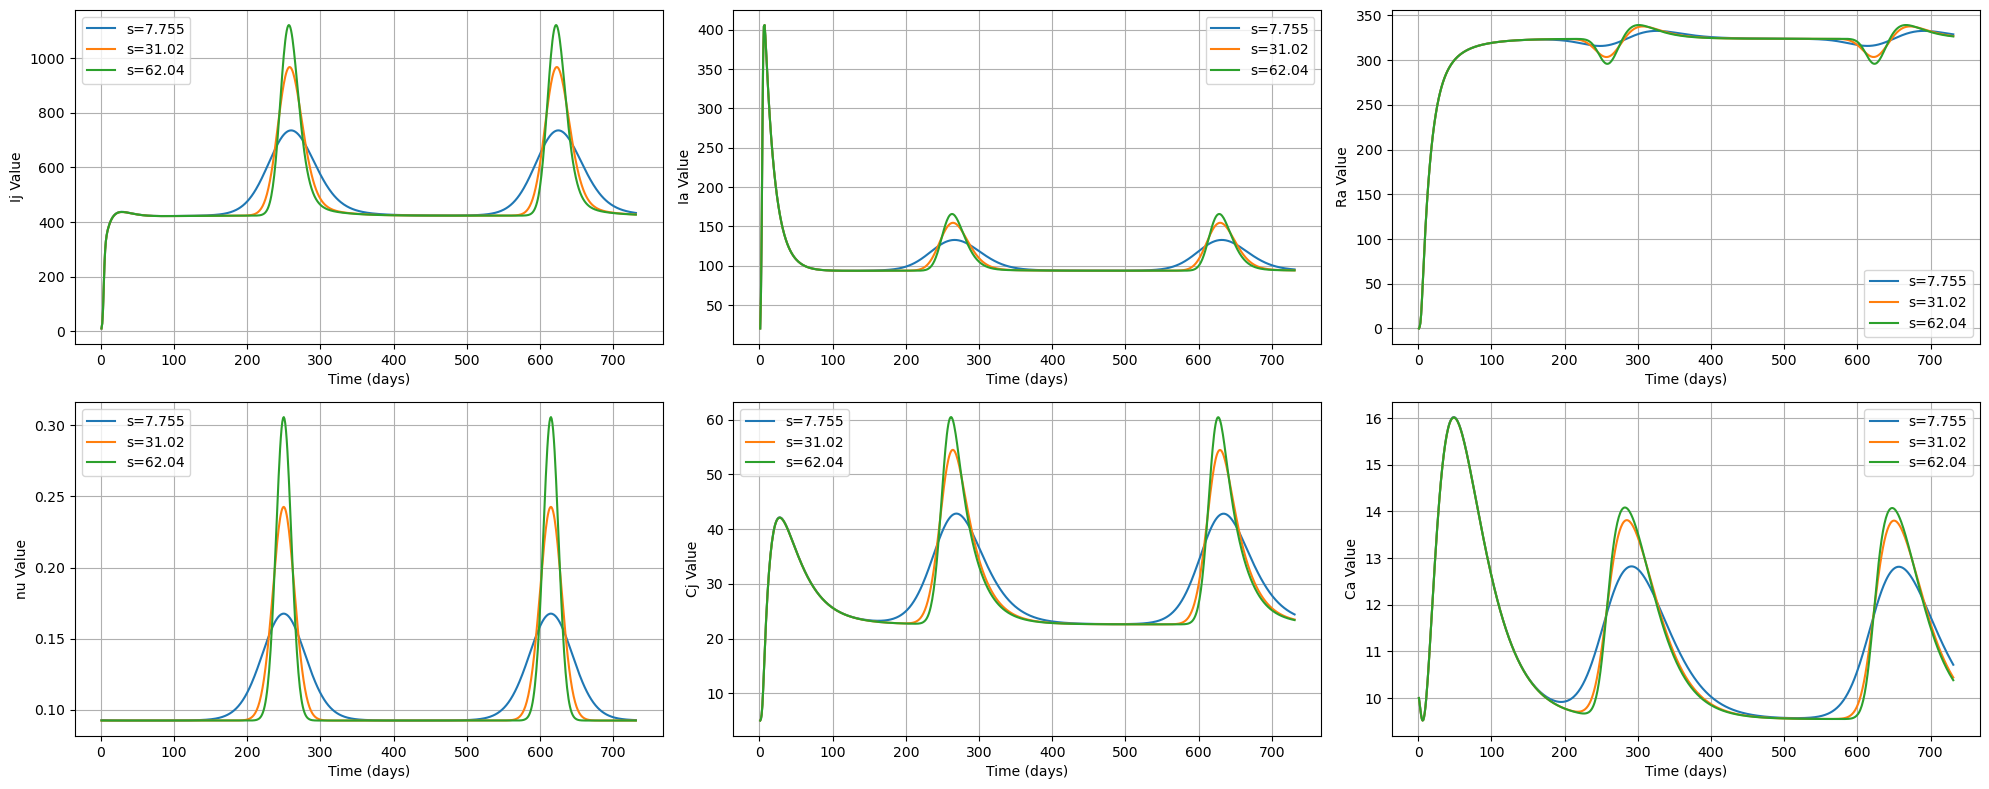

In [10]:

# Get the first, middle, and last 's' values
num_s_values = len(s_list)
first_s_value = s_list[0]
middle_s_value = s_list[8]  # Middle value for an odd-length list
last_s_value = s_list[-1]

# Filter the DataFrame for the desired 's' values
filtered_df = all_results_df[all_results_df['s'].isin([first_s_value, middle_s_value, last_s_value])]

# Create a figure with two rows and two columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Group data by 's' for the filtered DataFrame
grouped_data = filtered_df.groupby('s')

# Create a plot for each 's' group for Ij in the first column (top row)
for s, group in grouped_data:
    axes[0, 0].plot(group['Time'], group['Ij'], label=f's={s}')
    axes[0, 1].plot(group['Time'], group['Ia'], label=f's={s}')
    axes[0, 2].plot(group['Time'], group['Ra'], label=f's={s}')
    axes[1, 0].plot(group['Time'], group['nu'], label=f's={s}')
    axes[1, 1].plot(group['Time'], group['Cj'], label=f's={s}')
    axes[1, 2].plot(group['Time'], group['Ca'], label=f's={s}')



# Add grids to all subplots
for ax in axes.flatten():
    ax.grid(True)

# Customize the first subplot (Ij)
axes[0, 0].set_xlabel('Time (days)')
axes[0, 0].set_ylabel('Ij Value')
#axes[0, 0].set_title('Effect of Changing "s" on Time Series (Ij)')
axes[0, 0].legend()
#xes[0, 0].grid(True)

# Customize the second subplot (Ia)
axes[0, 1].set_xlabel('Time (days)')
axes[0, 1].set_ylabel('Ia Value')
#axes[0, 1].set_title('Effect of Changing "s" on Time Series (Ia)')
axes[0, 1].legend()

# Customize the subplot (Ia)
axes[0, 2].set_xlabel('Time (days)')
axes[0, 2].set_ylabel('Ra Value')
axes[0, 2].legend()

# Customize the third subplot (nu)
axes[1, 0].set_xlabel('Time (days)')
axes[1, 0].set_ylabel('nu Value')
#axes[1, 0].set_title('Effect of Changing "s" on Time Series (nu)')
axes[1, 0].legend()

# Customize the fourth subplot (Cj)
axes[1, 1].set_xlabel('Time (days)')
axes[1, 1].set_ylabel('Cj Value')
#axes[1, 1].set_ylim(0, 15)
axes[1, 1].legend()

# Customize the subplot (Cj)
axes[1, 2].set_xlabel('Time (days)')
axes[1, 2].set_ylabel('Ca Value')
#axes[1, 2].set_ylim(0, 15)
axes[1, 2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show or save the plot
plt.show()


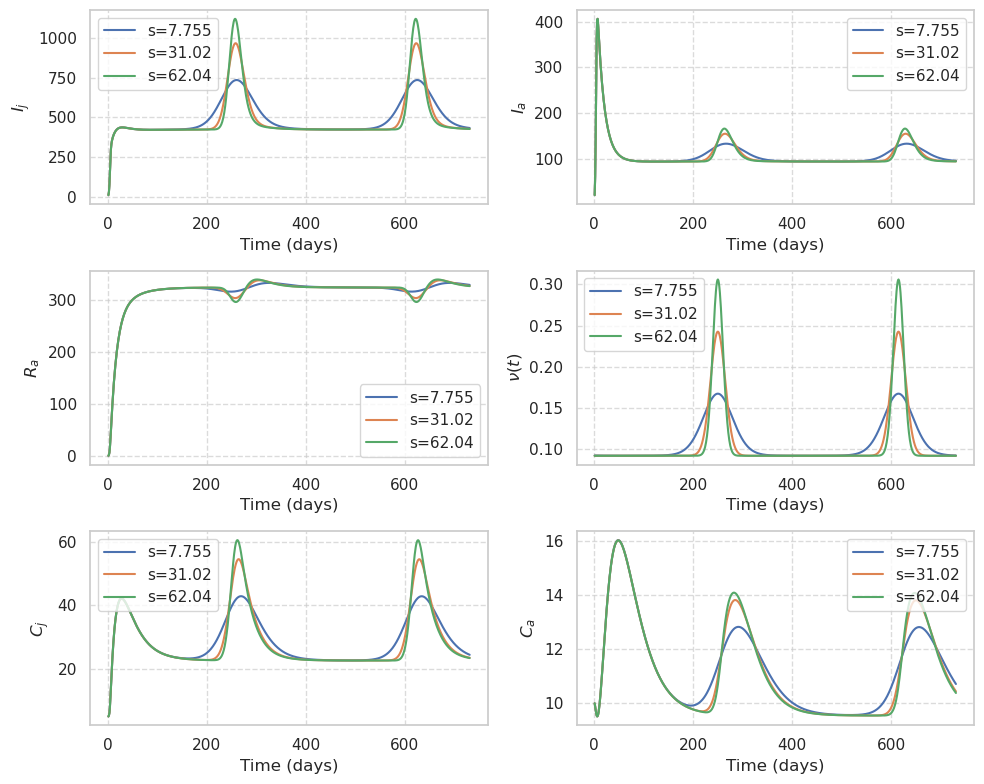

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced aesthetics


# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a figure with two rows and two columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Group data by 's' for the filtered DataFrame
grouped_data = filtered_df.groupby('s')

# Create a plot for each 's' group for Ij in the first column (top row)
for s, group in grouped_data:
    axes[0, 0].plot(group['Time'], group['Ij'], label=f's={s}')
    axes[0, 1].plot(group['Time'], group['Ia'], label=f's={s}')
    axes[1, 0].plot(group['Time'], group['Ra'], label=f's={s}')
    axes[1, 1].plot(group['Time'], group['nu'], label=f's={s}')
    axes[2, 0].plot(group['Time'], group['Cj'], label=f's={s}')
    axes[2, 1].plot(group['Time'], group['Ca'], label=f's={s}')

# Add grids to all subplots
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.7)

# Customize the subplots
for i in range(3):
    for j in range(2):
        axes[i, j].set_xlabel('Time (days)')
        axes[i, j].legend()
        axes[i, j].tick_params(axis='both', which='both')# , labelsize=10

axes[0, 0].set_ylabel(r'$I_j$')
axes[0, 1].set_ylabel(r'$I_a$')
axes[1, 0].set_ylabel(r'$R_a$')
axes[1, 1].set_ylabel(r'$\nu(t)$')
axes[2, 0].set_ylabel(r'$C_j$')
axes[2, 1].set_ylabel(r'$C_a$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot 
plt.savefig('birthing_synchrony.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Experiment involving a shift in the timing of the birth pulse.

In [12]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd  # Import Pandas
import numpy as np
from scipy import integrate
from scipy.integrate import odeint,solve_ivp
import sympy as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6] #[W,H]

K= 1000 # Carrying capacity

# Model parameters
alpha0=2.77/30 #5.12 #0.02
#alpha0=2.77/1000 #5.12 #0.02
#alpha1=0.1
k=4.51/30 # 55.60
s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.041666666666666664 #0.0166(our Cal) #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days


mu_j= 0.0028 #0.007/7  #0.0028#0.01666666666#2.31e-3 # 0.1
mu_a= 0.0037 #0.007/7  #0.0037#1/(50) #0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428


# mu_j_0 = 0.007/7
# mu_a_0 = 0.007/7


gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0

### Model parameters from Hammed
alpha0=2.77/30 #5.12 #0.02
#alpha1=0.1
k=4.51/30 # 55.60
s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.0166 #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days
mu_j=0.013 #0.15
mu_a=1/(50) #1/339 ()#0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428
gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0
###########

###### Time of integration ##################

t =np.arange(1.0, 365.0*3, 1)

# Model equations
def model(X, t, shift_weeks):

    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
    N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
    #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p
    shift_weeks = shift_weeks
    nu = alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))
    #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
    The np.where() function takes two arguments: a condition and a value to return if the condition is true,
    and a value to return if the condition is false. Here we use the np.where() function to return 0
    if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
    #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]# Create an array of shift values in weeks (both positive and negative)



shifts_weeks = [-8, -4, -2, 0, 2, 4, 8]


# Loop through different nu values
all_results_df = pd.DataFrame()  # Create an empty DataFrame to store results

for i in shifts_weeks:
    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = 500,10,0,0,200,20,0,0
    initial=[Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra]#, Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra]
    # Simulate the model
    X = odeint(model, initial, t, args=(i,))

    # Convert simulation results to a Pandas DataFrame
    result_df = pd.DataFrame(X, columns=['Sj', 'Ij', 'Cj', 'Rj', 'Sa', 'Ia', 'Ca', 'Ra'])

    # Add a new column for shift_weeks value
    result_df['shift_weeks'] = i

    # Append the simulation's DataFrame to the main DataFrame
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)


# Now all_results_df contains the simulation results in a Pandas DataFrame
all_results_df


,Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra,shift_weeks
0,500.000000,10.000000,0.000000,0.000000,200.000000,20.000000,0.000000,0.000000,-8
1,472.299810,43.480271,0.232658,1.103371,191.029198,33.051075,0.001766,1.164849,-8
2,403.910019,115.398000,0.648356,4.486131,164.278736,62.904315,0.008641,3.288029,-8
3,287.548429,230.929308,1.419333,12.071602,116.041445,112.342988,0.024943,7.289227,-8
4,164.650638,347.463989,2.647596,24.921989,63.716433,163.354297,0.057445,13.775291,-8
...,...,...,...,...,...,...,...,...,...
7653,45.274705,638.257406,43.643247,785.495649,0.611437,140.905435,17.654804,454.682250,8
7654,45.489359,634.188987,43.129736,779.993769,0.618824,139.817820,17.590055,454.799311,8
7655,45.690153,630.455057,42.634245,774.660492,0.625807,138.791901,17.523771,454.870895,8
7656,45.877216,627.028398,42.156236,769.496457,0.632390,137.825607,17.456096,454.899847,8


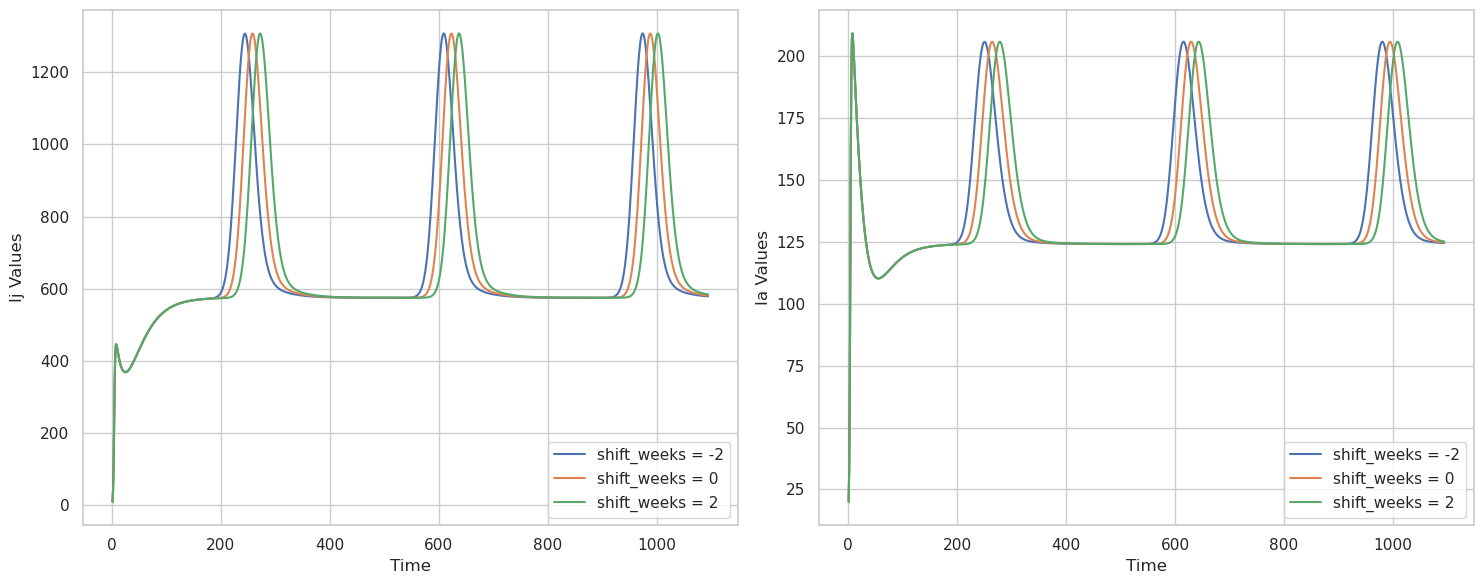

In [13]:
# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot 'Ij' values for all shifts_weeks in the first panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax1.plot(t, shift_results['Ij'], label=f'shift_weeks = {i}')

ax1.set_xlabel('Time')
ax1.set_ylabel('Ij Values')
#ax1.set_title('Variation of Ij')
ax1.legend()
ax1.grid(True)

# Plot 'Ia' values for all shifts_weeks in the second panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax2.plot(t, shift_results['Ia'], label=f'shift_weeks = {i}')

ax2.set_xlabel('Time')
ax2.set_ylabel('Ia Values')
#ax2.set_title('Variation of Ia')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

plt.show()

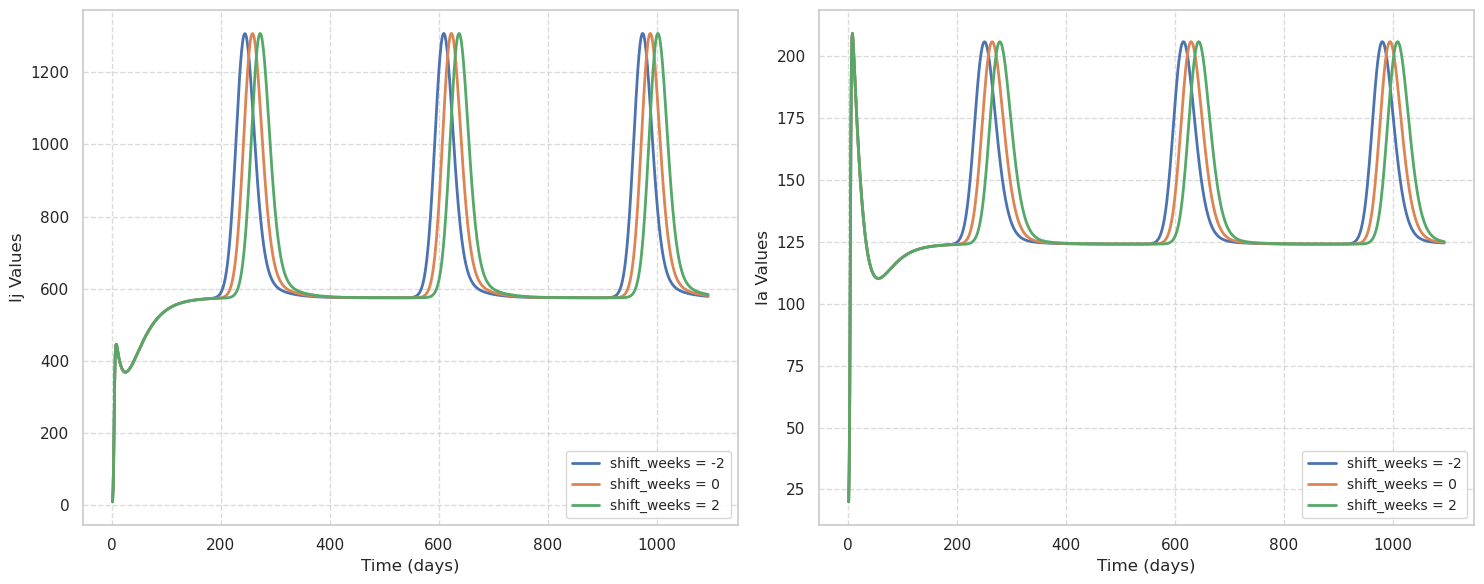

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced aesthetics

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot 'Ij' values for all shifts_weeks in the first panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax1.plot(t, shift_results['Ij'], label=f'shift_weeks = {i}', linewidth=2)

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Ij Values')
#ax1.set_title('Variation of Ij', fontsize=16)
ax1.legend(fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 'Ia' values for all shifts_weeks in the second panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax2.plot(t, shift_results['Ia'], label=f'shift_weeks = {i}', linewidth=2)

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Ia Values')
#ax2.set_title('Variation of Ia', fontsize=16)
ax2.legend(fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Save the plot
plt.savefig('changes_in_birthing_timing.pdf', dpi=300, bbox_inches='tight')

plt.show()


## Sensitivity analysis on $\mu_j$ and $\mu_a$

In [15]:
import pandas as pd
K= 1000 # Carrying capacity

# Model parameters
alpha0=2.77/30 #5.12 #0.02
#alpha0=2.77/1000 #5.12 #0.02
#alpha1=0.1
k=4.51/30 # 55.60
s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.041666666666666664 #0.0166(our Cal) #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days


mu_j= 0.0028 #0.007/7  #0.0028#0.01666666666#2.31e-3 # 0.1
mu_a= 0.0037 #0.007/7  #0.0037#1/(50) #0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428


# mu_j_0 = 0.007/7
# mu_a_0 = 0.007/7


gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0

### Model parameters from Hammed
alpha0=2.77/30 #5.12 #0.02
#alpha1=0.1
k=4.51/30 # 55.60
s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.0166 #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days
mu_j=0.15
mu_a=1/(50) #1/339 ()#0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428
gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0
###########

###### Time of integration ##################

t =np.arange(1.0, 366.0*3, 1)

# Model equations
def model(X, t, shift_weeks):

    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
    N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
    #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p
    shift_weeks = shift_weeks
    nu = alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))
    #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
    The np.where() function takes two arguments: a condition and a value to return if the condition is true,
    and a value to return if the condition is false. Here we use the np.where() function to return 0
    if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
    #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]


# Create an array of shift values in weeks (both positive and negative)
shifts_weeks = [0]
# Median and mean values for mu_j and mu_a
median_mu_j = 0.15
mean_mu_a = 1 / 50

# Create arrays of mu_j and mu_a values for sensitivity analysis
mu_j_values = np.linspace(0.001, 0.3, 20)  # Include a broader range
mu_a_values = np.linspace(0.01, 0.1, 20)  # Include a broader range

# Insert median and mean values into the arrays
mu_j_values = np.insert(mu_j_values, 10, median_mu_j)  # Insert at index 5
mu_a_values = np.insert(mu_a_values, 10, mean_mu_a)    # Insert at index 5

# Loop through different shift_weeks values
sensitivity_results = []

for mu_j_val in mu_j_values:
    for mu_a_val in mu_a_values:
        mu_j = mu_j_val
        mu_a = mu_a_val

        # Loop through different shift_weeks values
        for i in shifts_weeks:
            Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = 500, 10, 0, 0, 200, 20, 0, 0
            initial = [Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra]
            X = odeint(model, initial, t, args=(i,))

            result_df = pd.DataFrame(X, columns=['Sj', 'Ij', 'Cj', 'Rj', 'Sa', 'Ia', 'Ca', 'Ra'])
            result_df['Time'] = t  # Include time t as the first column
            result_df['shift_weeks'] = i
            result_df['mu_j'] = mu_j_val
            result_df['mu_a'] = mu_a_val

            sensitivity_results.append(result_df)

# Concatenate all simulation results
sensitivity_results_df = pd.concat(sensitivity_results, ignore_index=True)

# Now sensitivity_results_df contains the simulation results with time t as the first column
sensitivity_results_df


,Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra,Time,shift_weeks,mu_j,mu_a
0,500.000000,10.000000,0.000000,0.000000,200.000000,20.000000,0.000000,0.000000,1.0,0,0.001,0.01
1,476.258995,44.078256,0.234796,1.115783,192.352499,33.381675,0.001781,1.174515,2.0,0,0.001,0.01
2,409.338843,119.195604,0.662287,4.605392,166.001372,64.560066,0.008803,3.353325,3.0,0,0.001,0.01
3,289.782382,242.498071,1.470705,12.593145,116.379685,117.099613,0.025718,7.536665,4.0,0,0.001,0.01
4,162.491635,367.715463,2.777228,26.331587,62.316978,171.479295,0.059962,14.410793,5.0,0,0.001,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
483772,52.387032,35.029027,2.465097,20.698013,8.475333,19.329049,2.171567,62.625141,1093.0,0,0.300,0.10
483773,52.370886,35.016776,2.464949,20.693761,8.476182,19.330845,2.166225,62.580362,1094.0,0,0.300,0.10
483774,52.355237,35.004552,2.464840,20.689762,8.476916,19.332383,2.161011,62.536983,1095.0,0,0.300,0.10
483775,52.340088,34.992360,2.464764,20.685986,8.477555,19.333666,2.155923,62.494954,1096.0,0,0.300,0.10


/home/rsjohn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rsjohn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rsjohn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rsjohn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

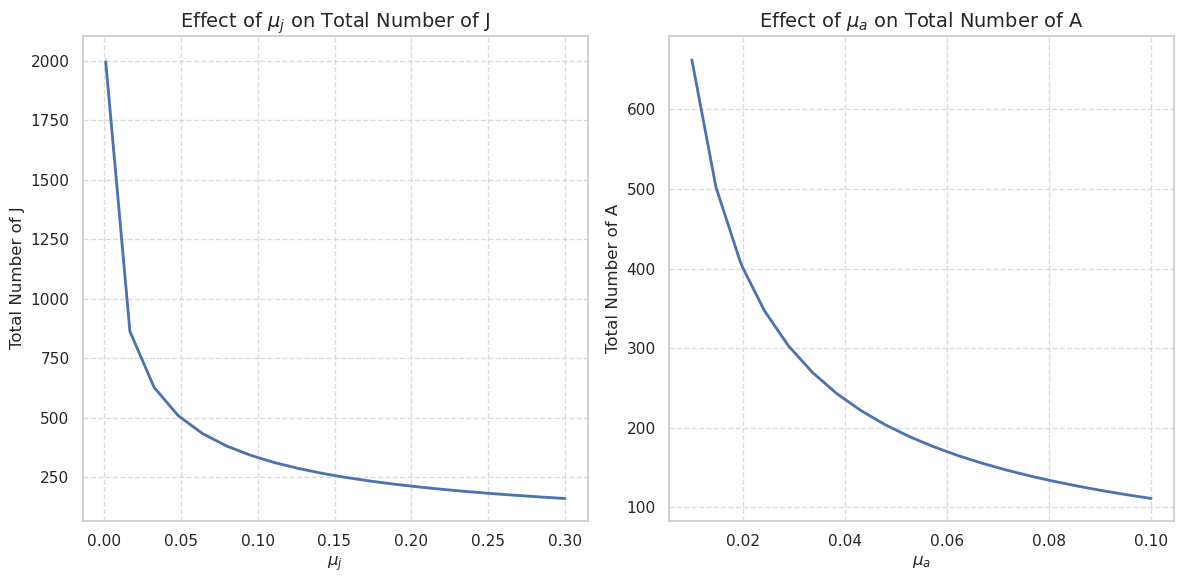

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of J and A for each simulation
sensitivity_results_df['Total_J'] = (
    sensitivity_results_df['Sj']
    + sensitivity_results_df['Ij']
    + sensitivity_results_df['Cj']
    + sensitivity_results_df['Rj']
)
sensitivity_results_df['Total_A'] = (
    sensitivity_results_df['Sa']
    + sensitivity_results_df['Ia']
    + sensitivity_results_df['Ca']
    + sensitivity_results_df['Ra']
)

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create line plots to show how Total_J and Total_A change with mu_j and mu_a
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Total Number of J
sns.lineplot(x='mu_j', y='Total_J', data=sensitivity_results_df, ax=axes[0], linewidth=2)
axes[0].set_title('Effect of $\\mu_j$ on Total Number of J', fontsize=14)
axes[0].set_xlabel('$\\mu_j$', fontsize=12)
axes[0].set_ylabel('Total Number of J', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot for Total Number of A
sns.lineplot(x='mu_a', y='Total_A', data=sensitivity_results_df, ax=axes[1], linewidth=2)
axes[1].set_title('Effect of $\\mu_a$ on Total Number of A', fontsize=14)
axes[1].set_xlabel('$\\mu_a$', fontsize=12)
axes[1].set_ylabel('Total Number of A', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('effect_of_mu_on_totals_300dpi.pdf', dpi=300, bbox_inches='tight')

plt.show()


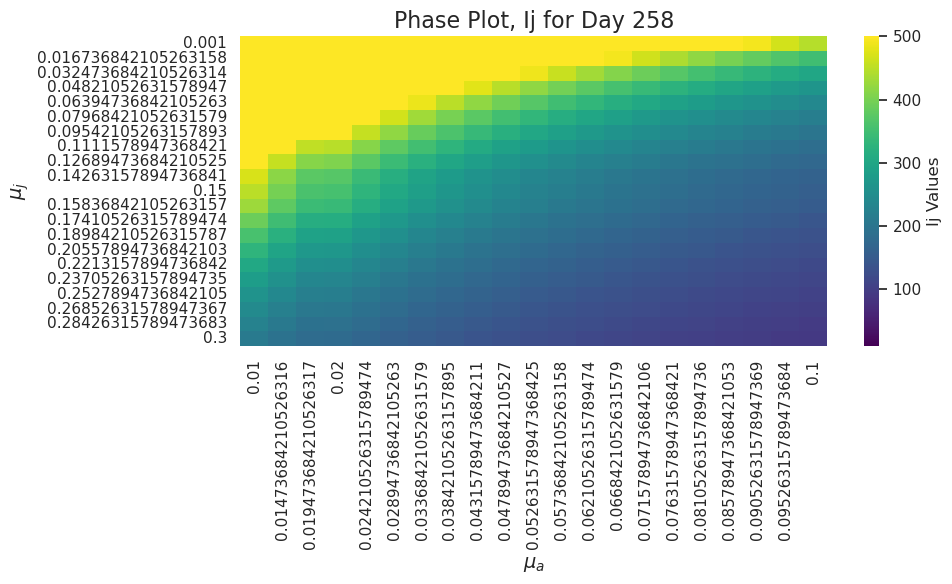

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the day
desired_day = 258  # For example, day 365

# Filter the sensitivity_results_df DataFrame for the desired day
desired_day_results = sensitivity_results_df[sensitivity_results_df['Time'] == desired_day]

# Set the desired color map value range
color_min = 10  # Minimum value for color map
color_max = 500  # Maximum value for color map

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a heatmap with fixed color map value range
fig, ax = plt.subplots(figsize=(10, 6))

heatmap_data = desired_day_results.pivot(index='mu_j', columns='mu_a', values='Ij')
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".3f", vmin=color_min, vmax=color_max, cbar_kws={'label': 'Ij Values'})

# Customize the plot
plt.title(f"Phase Plot, Ij for Day {desired_day}", fontsize=16)
plt.xlabel("$\mu_a$", fontsize=14)
plt.ylabel("$\mu_j$", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(f'phase_plot_Ij_day_{desired_day}_300dpi.pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Choose the day for Ij
# desired_day_Ij = 258  # For example, day 365

# # Choose the day for Ia
# desired_day_Ia = 258  # For example, a different day

# # Filter the sensitivity_results_df DataFrame for Ij
# desired_day_results_Ij = sensitivity_results_df[sensitivity_results_df['Time'] == desired_day_Ij]

# # Filter the sensitivity_results_df DataFrame for Ia
# desired_day_results_Ia = sensitivity_results_df[sensitivity_results_df['Time'] == desired_day_Ia]

# # Set the desired color map value range for Ij
# color_min_Ij = 10  # Minimum value for color map for Ij
# color_max_Ij = 500  # Maximum value for color map for Ij

# # Set the desired color map value range for Ia
# color_min_Ia = 10  # Minimum value for color map for Ia
# color_max_Ia = 50  # Maximum value for color map for Ia

# # Create a figure with two subplots (panels)
# fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# # Create a heatmap for Ij
# heatmap_data_Ij = desired_day_results_Ij.pivot(index='mu_j', columns='mu_a', values='Ij')
# sns.heatmap(heatmap_data_Ij, cmap='viridis', annot=False, fmt=".3f", vmin=color_min_Ij, vmax=color_max_Ij, ax=axs[0])  # Panel 1

# # Create a heatmap for Ia
# heatmap_data_Ia = desired_day_results_Ia.pivot(index='mu_j', columns='mu_a', values='Ia')
# sns.heatmap(heatmap_data_Ia, cmap='viridis', annot=False, fmt=".3f", vmin=color_min_Ia, vmax=color_max_Ia, ax=axs[1])  # Panel 2

# # Customize the plots
# axs[0].set_title(f"Phase Plot, Ij for Day {desired_day_Ij}")
# axs[0].set_xlabel("mu_a")
# axs[0].set_ylabel("mu_j")

# axs[1].set_title(f"Phase Plot, Ia for Day {desired_day_Ia}")
# axs[1].set_xlabel("mu_a")
# axs[1].set_ylabel("mu_j")

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()


/home/rsjohn/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


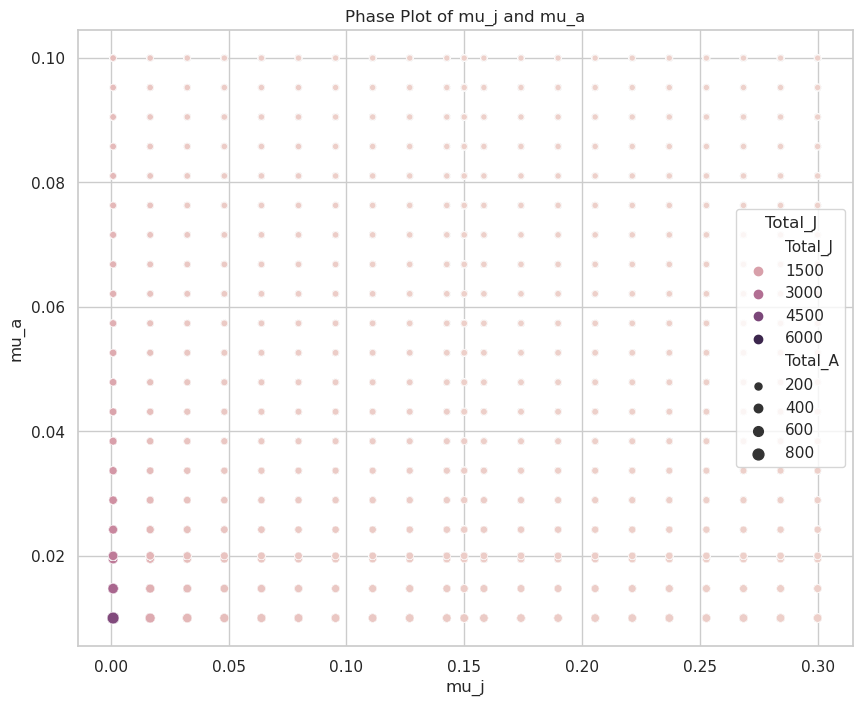

In [20]:
# Calculate the total number of J and A for each simulation
sensitivity_results_df['Total_J'] = (
    sensitivity_results_df['Sj']
    + sensitivity_results_df['Ij']
    + sensitivity_results_df['Cj']
    + sensitivity_results_df['Rj']
)
sensitivity_results_df['Total_A'] = (
    sensitivity_results_df['Sa']
    + sensitivity_results_df['Ia']
    + sensitivity_results_df['Ca']
    + sensitivity_results_df['Ra']
)

# Create a phase plot with color coded points using hue_norm
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mu_j', y='mu_a', hue='Total_J', size='Total_A', data=sensitivity_results_df,
                hue_norm=(sensitivity_results_df['Total_J'].min(), sensitivity_results_df['Total_J'].max()))
plt.title('Phase Plot of mu_j and mu_a')
plt.xlabel('mu_j')
plt.ylabel('mu_a')
plt.legend(title='Total_J')
plt.show()


In [21]:
%selected_data

NameError: name 'selected_data' is not defined

In [18]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

# Model parameters
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = (1.45e-3) / 2
rho = 0.1
theta = 1.05
Tj = 0.0166
mu_j = 0.15
mu_a = 1 / 50
gamma_j = 0.0457
gamma_a = 0.0457
q = 0
# Time of integration
t = np.arange(1.0, 365.0 * 3, 1)

# Model equations
def model(X, t, shift_weeks):
    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
    N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
    #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p
    shift_weeks = shift_weeks
    nu = alpha0 + k * np.exp(-s * (np.cos(np.pi * (t - shift_weeks*7) / 365 - varphi) ** 2))
    #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
    The np.where() function takes two arguments: a condition and a value to return if the condition is true,
    and a value to return if the condition is false. Here we use the np.where() function to return 0
    if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
    #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]

# Array of shift values in weeks
shifts_weeks = [-8, -4, -2, 0, 2, 4, 8]

# Initialize results DataFrame
all_results_df = pd.DataFrame()

for i in shifts_weeks:
    # Initial conditions
    initial = [500, 10, 0, 0, 200, 20, 0, 0]
    X = odeint(model, initial, t, args=(i,))
    result_df = pd.DataFrame(X, columns=['Sj', 'Ij', 'Cj', 'Rj', 'Sa', 'Ia', 'Ca', 'Ra'])
    result_df['shift_weeks'] = i
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)

# Display the simulation results
all_results_df


,Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra,shift_weeks
0,500.000000,10.000000,0.000000,0.000000,200.000000,20.000000,0.000000,0.000000,-8
1,430.577021,38.354236,0.221060,0.988022,191.268183,32.527629,0.001706,1.158478,-8
2,346.111540,87.107281,0.581371,3.525631,167.853860,58.342213,0.008034,3.183441,-8
3,248.902348,151.690980,1.191606,8.299823,128.794137,97.823052,0.022143,6.744750,-8
4,159.134194,210.727936,2.105460,15.350070,84.588695,140.102754,0.048652,12.276178,-8
...,...,...,...,...,...,...,...,...,...
7653,76.217139,164.215305,6.482757,63.355707,3.322449,74.896678,8.725187,319.908796,8
7654,76.390102,163.620087,6.419379,63.008821,3.350610,74.329649,8.701192,319.784776,8
7655,76.550268,163.087609,6.359691,62.691275,3.377135,73.792691,8.676809,319.641356,8
7656,76.697713,162.610442,6.303470,62.401286,3.402053,73.284630,8.652085,319.480058,8


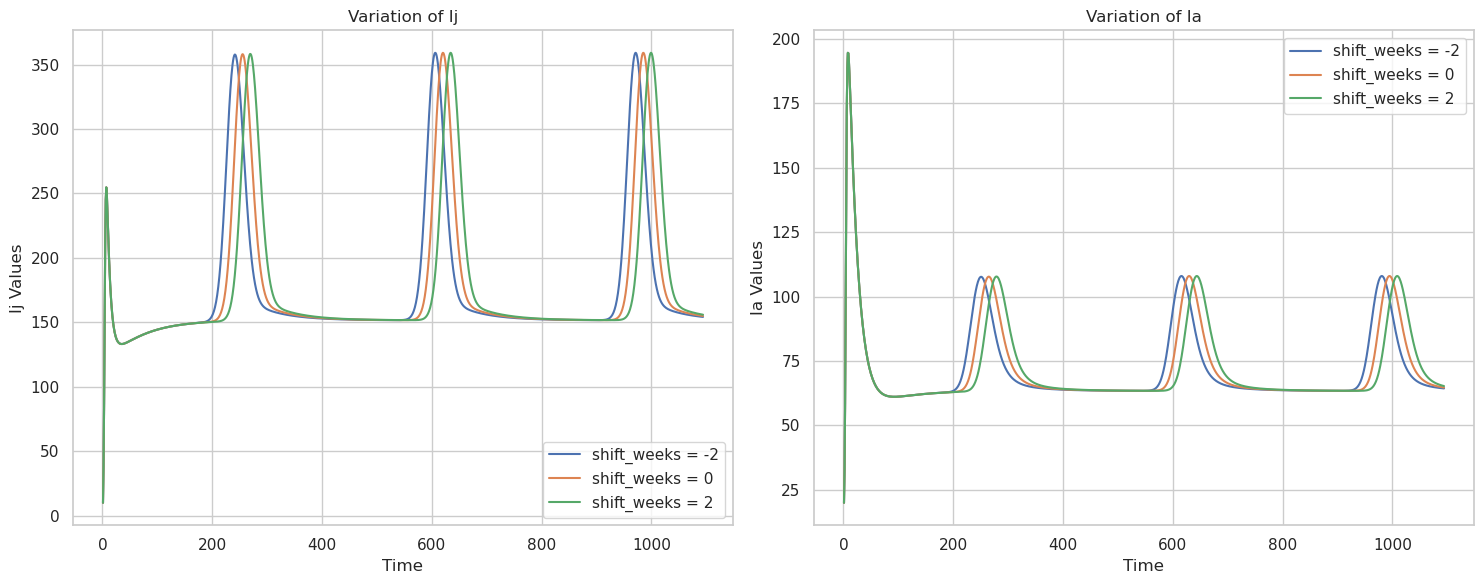

In [19]:
# Create a subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot 'Ij' values for all shifts_weeks in the first panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax1.plot(t, shift_results['Ij'], label=f'shift_weeks = {i}')

ax1.set_xlabel('Time')
ax1.set_ylabel('Ij Values')
ax1.set_title('Variation of Ij')
ax1.legend()
ax1.grid(True)

# Plot 'Ia' values for all shifts_weeks in the second panel
for i in shifts_weeks[2:-2]:
    shift_results = all_results_df[all_results_df['shift_weeks'] == i]
    ax2.plot(t, shift_results['Ia'], label=f'shift_weeks = {i}')

ax2.set_xlabel('Time')
ax2.set_ylabel('Ia Values')
ax2.set_title('Variation of Ia')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

plt.show()

### Include some chronically infected populations in the initial conditions.

/tmp/ipykernel_4683/2182773169.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10').colors


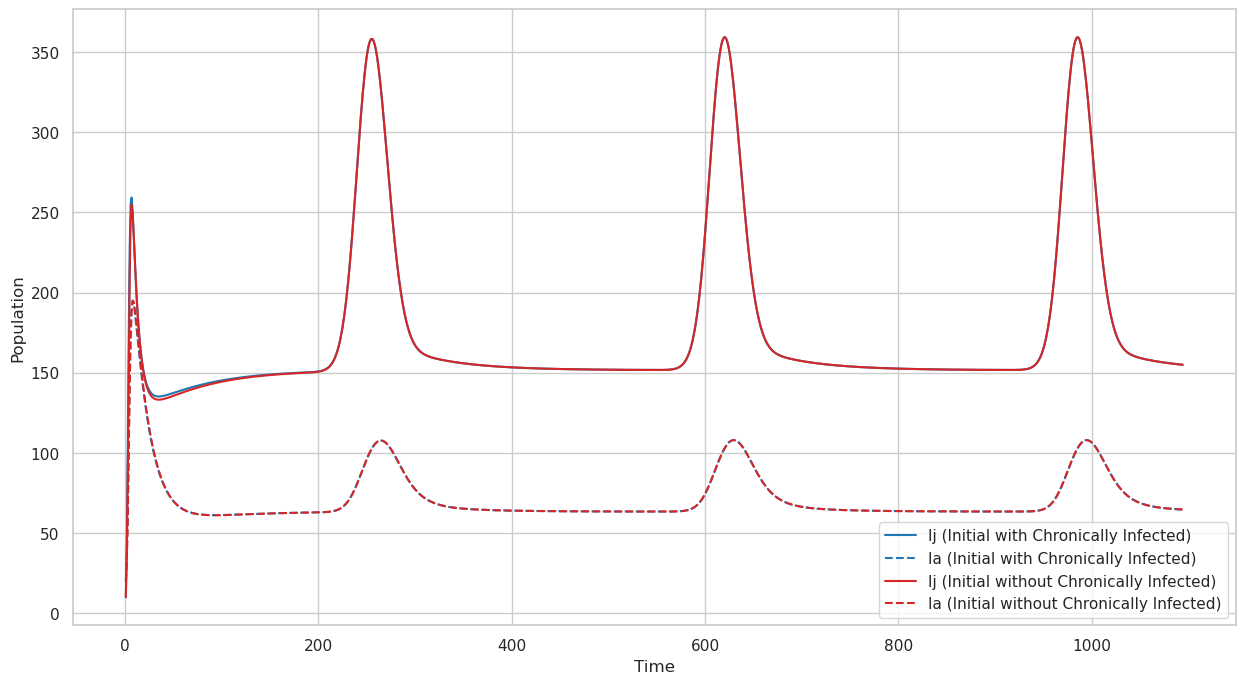

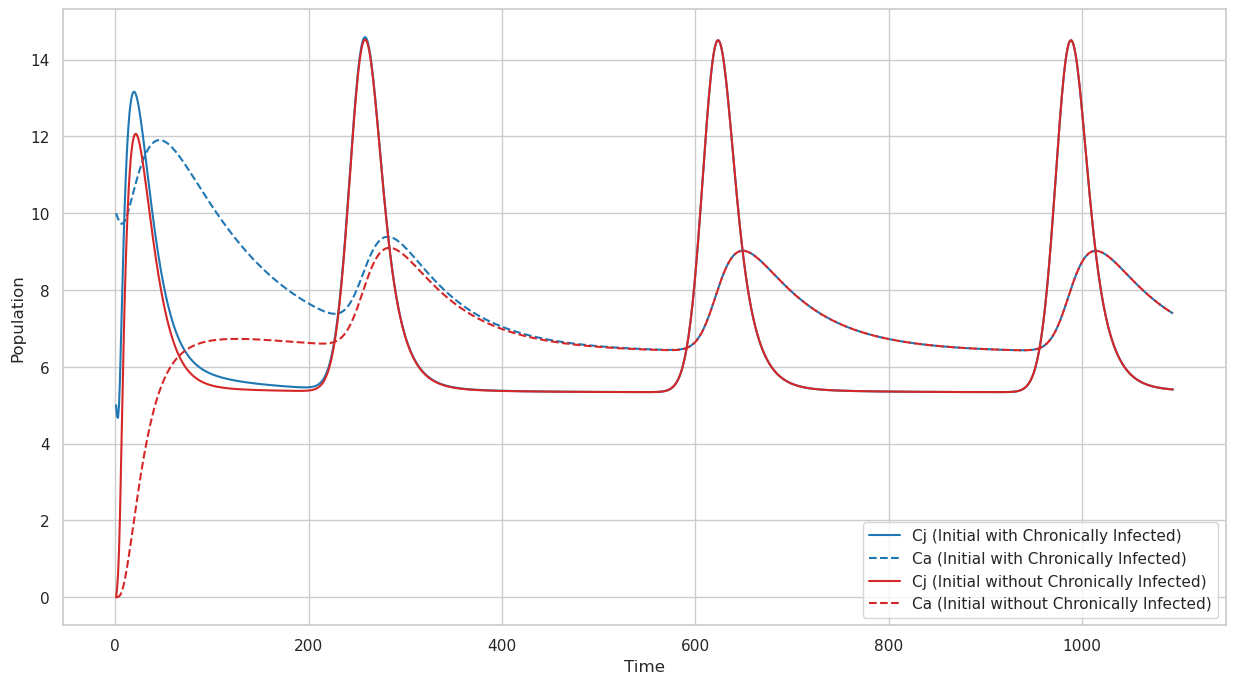

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
K = 1000
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = 1.45e-3 / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664
mu_j = 0.0028
mu_a = 0.0037
gamma_j = 0.0457
gamma_a = 0.0457
q = 0

### Model parameters from Hammed
alpha0=2.77/30 #5.12 #0.02
#alpha1=0.1
k=4.51/30 # 55.60
s=31.02 #26.04
varphi=0.58
Bjj=1.45e-3 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
Bja=1.45e-3
Baa=1.45e-3
Bc=(1.45e-3)/2
rho=0.1
theta=1.05
Tj=0.0166 #0.01063829787 from https://apps.who.int/iris/bitstream/handle/10665/261080/PMC2366655.pdf?sequence=1&isAllowed=y
# The age at first litter can be regarded as 94 days
mu_j=0.15
mu_a=1/(50) #1/339 ()#0.01 # 0.00663571428 from https://www.jstor.org/stable/1814 R. natalensis
#the death-rate was 0.1858 per head per 28 days (0.1858/28) =  0.00663571428
gamma_j=0.0457
gamma_a=0.0457 # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7529244/
q = 0
###########

t = np.arange(1.0, 365.0 * 3, 1)

# Birth pulse
def calculate_nu(t):
    return alpha0 + k * np.exp(-s * (np.cos(np.pi * t / 365 - varphi) ** 2))

# Model equations
def model(X, t):
    # Unpack variables
    Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = X
    N = Sj + Ij + Cj + Rj + Sa + Ia + Ca + Ra
    nu = calculate_nu(t)

    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]

# Initial conditions
initial1 = [500, 10, 5, 0, 200, 20, 10, 0]
initial2 = [500, 10, 0, 0, 200, 20, 0, 0]

X1 = odeint(model, initial1, t)
X2 = odeint(model, initial2, t)

# Custom color palette
colors = plt.cm.get_cmap('tab10').colors

# Create subplots
fig, ax = plt.subplots(figsize=(15, 8))
#fig.suptitle('Infected Population', fontsize=16)

# Juvenile Population (Initial 1)
ax.plot(t, X1[:, 1], '-', color=colors[0], label='Ij (Initial with Chronically Infected)')
ax.plot(t, X1[:, 5], '--', color=colors[0], label='Ia (Initial with Chronically Infected)')

# Juvenile Population (Initial 2)
ax.plot(t, X2[:, 1], '-', color=colors[3], label='Ij (Initial without Chronically Infected)')
ax.plot(t, X2[:, 5], '--', color=colors[3], label='Ia (Initial without Chronically Infected)')

# # Adult Population (Initial 1)
# ax.plot(t, X1[:, 7], '-', color=colors[7], label='Ra (Initial with Chronically Infected)')

# # Adult Population (Initial 2)
# ax.plot(t, X2[:, 7], '--', color=colors[3], label='Ra (Initial without Chronically Infected)')

#ax.set_title('Population Dynamics Comparison')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# Create a new panel for chronically infected population
fig2, ax2 = plt.subplots(figsize=(15, 8))
#fig2.suptitle('Chronically Infected Population', fontsize=16)

# Chronically Infected Population (Initial 1 with Chronically Infected)
ax2.plot(t, X1[:, 2], '-', color=colors[0], label='Cj (Initial with Chronically Infected)')

# Chronically Infected Population (Initial 1 without Chronically Infected)
ax2.plot(t, X1[:, 6], '--', color=colors[0], label='Ca (Initial with Chronically Infected)')

# Chronically Infected Population (Initial 2 with Chronically Infected)
ax2.plot(t, X2[:, 2], '-', color=colors[3], label='Cj (Initial without Chronically Infected)')

# Chronically Infected Population (Initial 2 without Chronically Infected)
ax2.plot(t, X2[:, 6], '--', color=colors[3], label='Ca (Initial without Chronically Infected)')

ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')

ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')

# Show both plots
plt.show()

/tmp/ipykernel_4683/3269684079.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10').colors


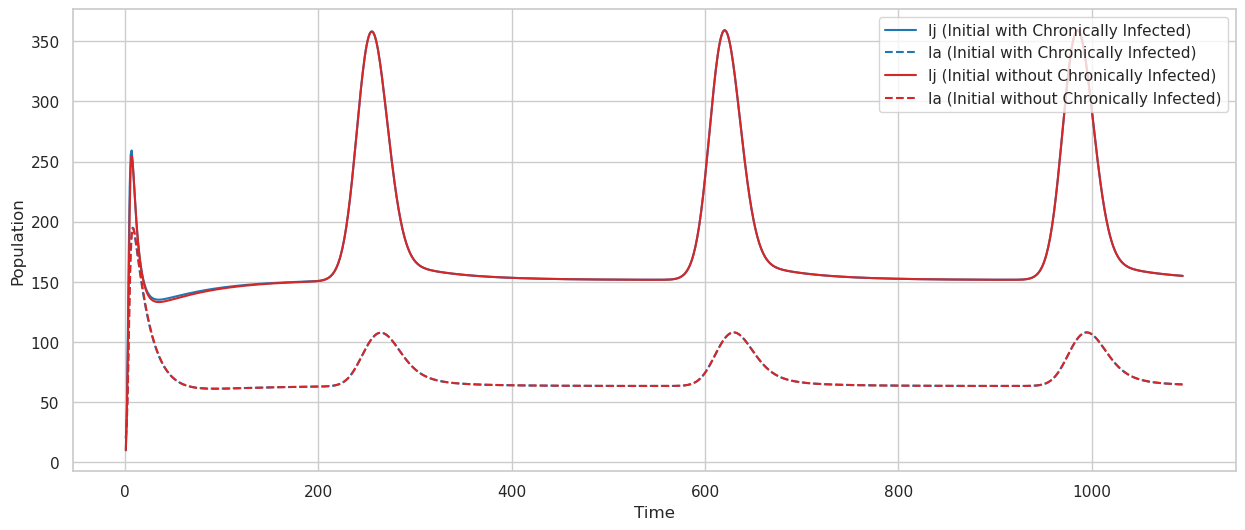

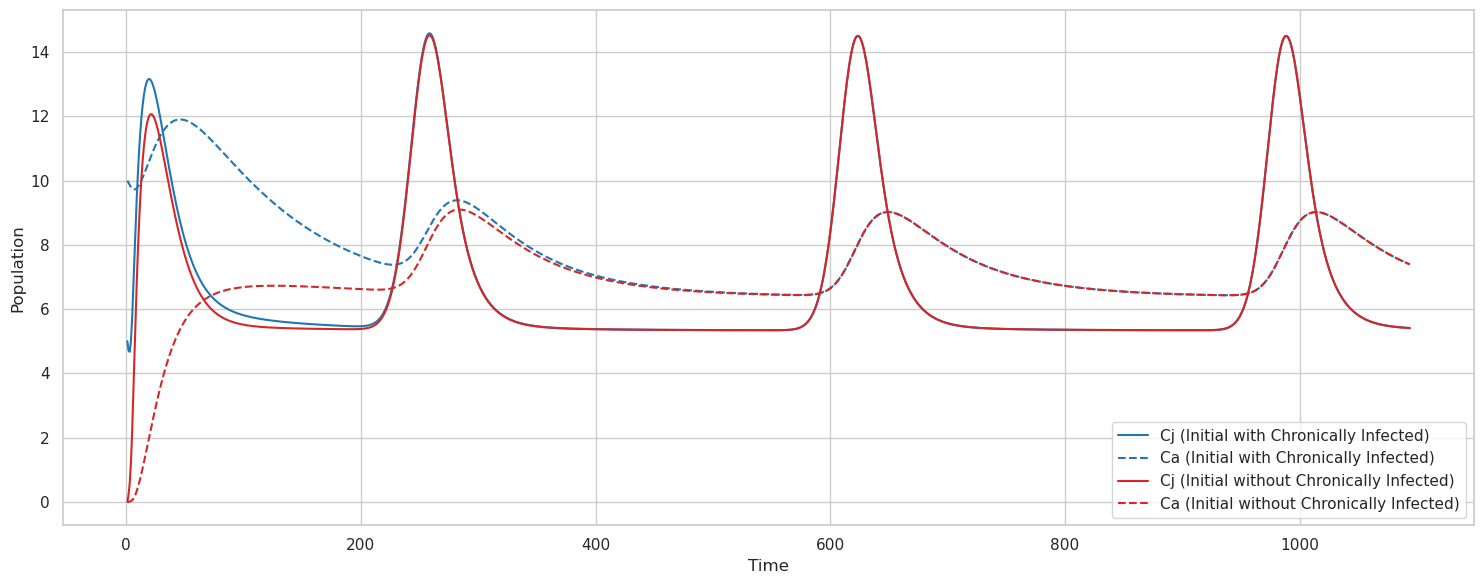

In [21]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np


# Custom color palette
colors = plt.cm.get_cmap('tab10').colors

# Create subplots for Infected Population
fig, ax = plt.subplots(figsize=(15, 6))
#fig.suptitle('Infected Population', fontsize=16)

# Juvenile Population (Initial 1)
ax.plot(t, X1[:, 1], '-', color=colors[0], label='Ij (Initial with Chronically Infected)')
ax.plot(t, X1[:, 5], '--', color=colors[0], label='Ia (Initial with Chronically Infected)')

# Juvenile Population (Initial 2)
ax.plot(t, X2[:, 1], '-', color=colors[3], label='Ij (Initial without Chronically Infected)')
ax.plot(t, X2[:, 5], '--', color=colors[3], label='Ia (Initial without Chronically Infected)')

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')
# Save the plot
plt.savefig('infected_population_comparison_300dpi.pdf', dpi=300, bbox_inches='tight')

# Create a new panel for chronically infected population
fig2, ax2 = plt.subplots(figsize=(15, 6))
#fig2.suptitle('Chronically Infected Population', fontsize=16)

# Chronically Infected Population (Initial 1 with Chronically Infected)
ax2.plot(t, X1[:, 2], '-', color=colors[0], label='Cj (Initial with Chronically Infected)')

# Chronically Infected Population (Initial 1 without Chronically Infected)
ax2.plot(t, X1[:, 6], '--', color=colors[0], label='Ca (Initial with Chronically Infected)')

# Chronically Infected Population (Initial 2 with Chronically Infected)
ax2.plot(t, X2[:, 2], '-', color=colors[3], label='Cj (Initial without Chronically Infected)')

# Chronically Infected Population (Initial 2 without Chronically Infected)
ax2.plot(t, X2[:, 6], '--', color=colors[3], label='Ca (Initial without Chronically Infected)')

ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('Chronically_infected_population_comparison_300dpi.pdf', dpi=300, bbox_inches='tight')

# Show both plots
plt.show()


### How synchronous are the peaks in `Ij` and `Ia`?

In [22]:
import numpy as np
from scipy.signal import find_peaks

# Extract the relevant columns
Ij1 = X1[:, 1]  # Juvenile Infected for X1
Ia1 = X1[:, 5]  # Adult Infected for X1
Ij2 = X2[:, 1]  # Juvenile Infected for X2
Ia2 = X2[:, 5]  # Adult Infected for X2

# Find peaks in Ij and Ia for both datasets
peaks_Ij1, _ = find_peaks(Ij1)
peaks_Ia1, _ = find_peaks(Ia1)
peaks_Ij2, _ = find_peaks(Ij2)
peaks_Ia2, _ = find_peaks(Ia2)

# Calculate peak times for both datasets
peak_times_Ij1 = t[peaks_Ij1]
peak_times_Ia1 = t[peaks_Ia1]
peak_times_Ij2 = t[peaks_Ij2]
peak_times_Ia2 = t[peaks_Ia2]

# Calculate time differences for both datasets
time_differences1 = []
time_differences2 = []

# Align the peaks and calculate time differences for X1
for peak_Ij in peak_times_Ij1:
    closest_peak_Ia_idx = np.argmin(np.abs(peak_times_Ia1 - peak_Ij))
    closest_peak_Ia = peak_times_Ia1[closest_peak_Ia_idx]
    time_difference = closest_peak_Ia - peak_Ij
    time_differences1.append(time_difference)

# Align the peaks and calculate time differences for X2
for peak_Ij in peak_times_Ij2:
    closest_peak_Ia_idx = np.argmin(np.abs(peak_times_Ia2 - peak_Ij))
    closest_peak_Ia = peak_times_Ia2[closest_peak_Ia_idx]
    time_difference = closest_peak_Ia - peak_Ij
    time_differences2.append(time_difference)

# Calculate mean time differences for both datasets
mean_time_difference_X1 = np.mean(time_differences1)
mean_time_difference_X2 = np.mean(time_differences2)

# Print the mean time differences for both datasets
print(f"Mean Time Difference between Ij and Ia Peaks for X1: {mean_time_difference_X1:.2f} days")
print(f"Mean Time Difference between Ij and Ia Peaks for X2: {mean_time_difference_X2:.2f} days")


Mean Time Difference between Ij and Ia Peaks for X1: 7.75 days
Mean Time Difference between Ij and Ia Peaks for X2: 7.75 days


In [23]:
print(peak_times_Ij1)
print(peak_times_Ia1)


[  7. 255. 620. 985.]
[  8. 265. 630. 995.]


In [24]:
peak_times_Ij1[2:] - peak_times_Ia1[1:]

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [25]:
peak_times_Ij1[2:] - peak_times_Ij2[1:]

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [26]:
peak_times_Ia1[1:] - peak_times_Ia2[1:]

array([0., 0., 0.])

In [27]:
print(peak_times_Ij2)
print(peak_times_Ia2)
print(peak_times_Ij2 - peak_times_Ia2)

[  7. 255. 620. 985.]
[  8. 265. 630. 995.]
[ -1. -10. -10. -10.]


In [28]:
nu = calculate_nu(t)
peaks_nu, _ = find_peaks(nu)
peaks_nu

array([249, 614, 979])

In [29]:
print(peak_times_Ij1[2]-peaks_nu[0])
print(peak_times_Ia1[1]-peaks_nu[0])

371.0
16.0


In [30]:
print(peak_times_Ij2[1]-peaks_nu[0])
print(peak_times_Ia2[1]-peaks_nu[0])

6.0
16.0


 ## Experiment with different solvers to see if they affect the stability of the solution.

Using solver: RK45
Using solver: RK23
Using solver: Radau
Using solver: BDF
Using solver: LSODA


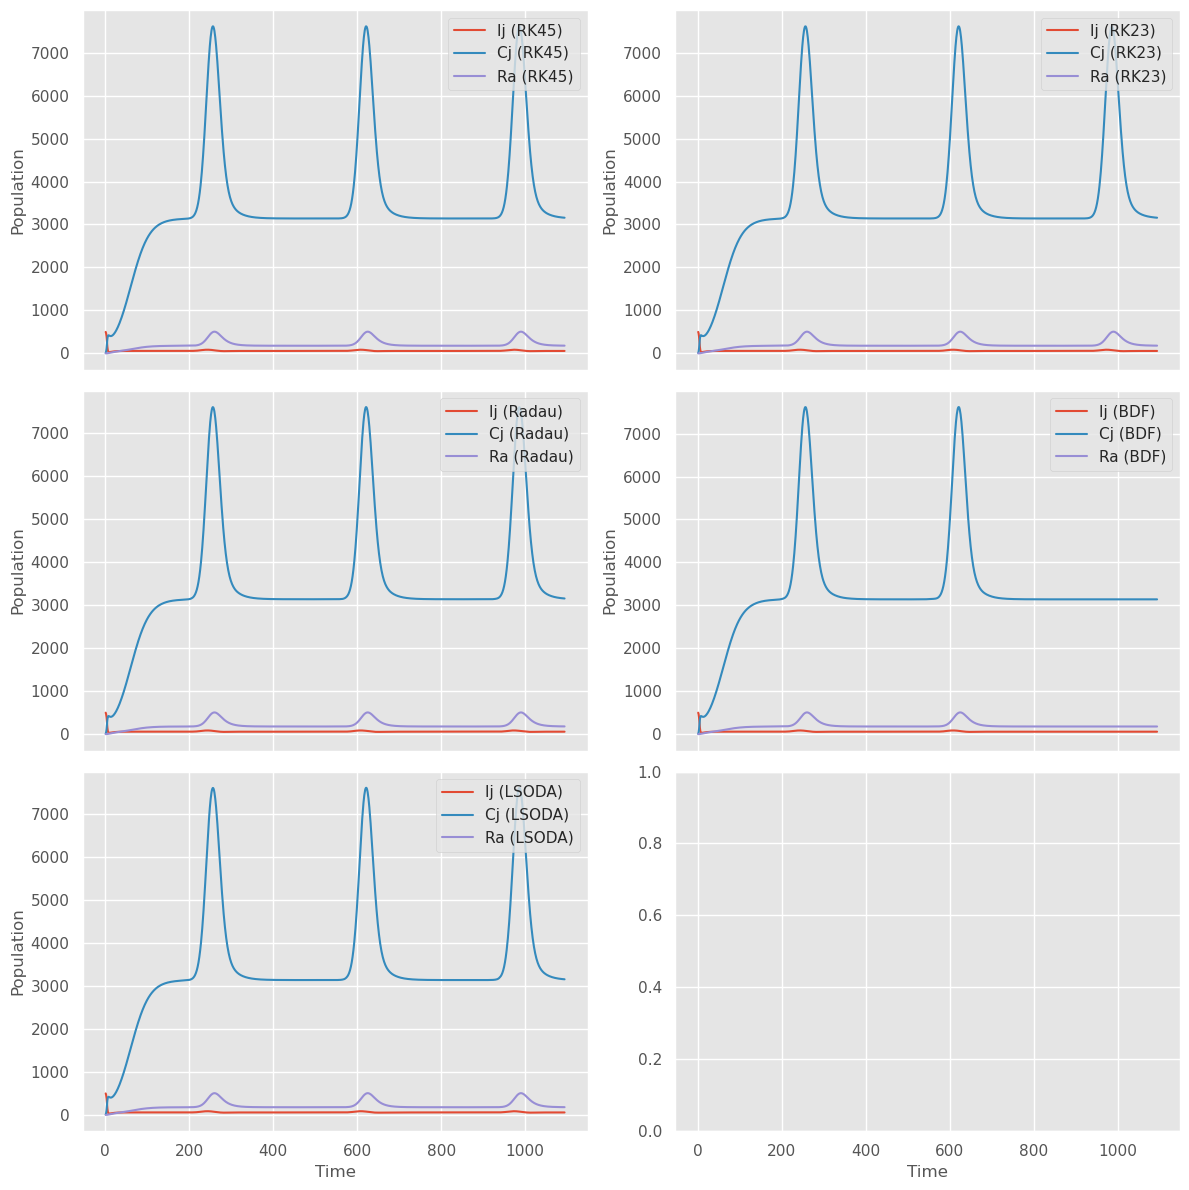

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams['figure.figsize'] = [12, 6]  # [W,H]

K = 730  # Carrying capacity

# Model parameters
alpha0 = 2.77 / 30
k = 4.51 / 30
s = 31.02
varphi = 0.58
Bjj = 1.45e-3
Bja = 1.45e-3
Baa = 1.45e-3
Bc = (1.45e-3) / 2
rho = 0.1
theta = 1.05
Tj = 0.041666666666666664

mu_j = 0.0028
mu_a = 0.0037

gamma_j = 0.0457
gamma_a = 0.0457
q = 0

# Time of integration
t_span = (1.0, 365.0 * 3)

def model(t,X):

    Sj,Ij,Cj,Rj,Sa,Ia,Ca,Ra = X #,N = X
    N = Sj+Ij+Cj+Rj+Sa+Ia+Ca+Ra
    #alpha0,k,s,phi,Bjj,Bja,Baa,Bc,Tj,mu_j,mu_a,gamma_j,gamma_a = p

    nu =alpha0+k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2))
    #mu_j = mu_j_0+0.2+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    #mu_a = mu_a_0+np.where(np.cos(np.pi*t/365 - varphi)**2 < 0, 0, k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)))
    ''' We add a check to make sure that the exponent is non-negative by using the np.where() function.
    The np.where() function takes two arguments: a condition and a value to return if the condition is true,
    and a value to return if the condition is false. Here we use the np.where() function to return 0
    if the exponent is negative, and k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2)) if the exponent is non-negative.'''
    #nu = alpha0*(1+alpha1*np.sin(2*np.pi*t/365.0))


    dSjdt = nu*(Sa+Ra+(1-rho)*(Ia+Ca))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj * (N/(K)) #* (1-N/K)#* N/K
    #dSjdt = (nu*(Sa+Ra+(1-rho)*(Ia+Ca)))-((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Sj-mu_j*Sj


    dIjdt = ((Bja*Ia+Bjj*Ij+Bc*(Cj+Ca))*Sj)/(N**q)-Tj*Ij-gamma_j*Ij-mu_j*Ij * (N/(K)) #* (1-N/K)#* N/K


    dCjdt = nu*(rho*(Ia+Ca))-Tj*Cj-theta*mu_j*Cj * (N/(K-1))#* (1-N/K)#* N/K

    dRjdt = gamma_j*Ij-Tj*Rj-mu_j*Rj * (N/(K-1))#* (1-N/K)#* N/K

    dSadt = Tj*Sj-((Baa*Ia+Bja*Ij+Bc*(Ca+Cj))*Sa)/(N**q)-mu_a*Sa * (N/(K))#* (1-N/K)#* N/K

    dIadt = Tj*Ij + ((Baa*Ia+Bja*Ij+Bc*(Cj+Ca))*Sa)/(N**q)-gamma_a*Ia-mu_a*Ia * (N/(K))#* (1-N/K)#* N/K

    dCadt = Tj*Cj-theta*mu_a*Ca * (N/(K))#* (1-N/K)#* N/K

    dRadt = gamma_a*Ia+Tj*Rj-mu_a*Ra * (N/(K))#* (1-N/K)#* N/K

    #dNdt = 0.02*(N*(1-N/K)) - mu_a*N
    return [dSjdt, dIjdt, dCjdt, dRjdt, dSadt, dIadt, dCadt, dRadt]#, dNdt]

# Initial conditions
Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra = 500, 10, 0, 0, 200, 20, 0, 0
initial = [Sj, Ij, Cj, Rj, Sa, Ia, Ca, Ra]


# Variables to plot together and solvers to test
variables_to_plot = ['Ij', 'Cj', 'Ra']
solvers = ['RK45', 'RK23', 'Radau', 'BDF', 'LSODA']

# Calculate the number of rows and columns for the subplots
num_solvers = len(solvers)
num_rows = (num_solvers + 1) // 2  # Calculate the number of rows needed
num_cols = 2  # Two columns of subplots

# Plot 'Ij', 'Cj', and 'Ra' together in a single plot with multiple subplots
plt.rcParams['figure.figsize'] = [12, 4 * num_rows]
plt.style.use('ggplot')
fig, axs = plt.subplots(num_rows, num_cols, sharex=True)

for i, solver in enumerate(solvers):
    row = i // num_cols
    col = i % num_cols

    print(f"Using solver: {solver}")

    # Use solve_ivp function with the chosen solver
    sol = solve_ivp(model, t_span, initial, method=solver, t_eval=np.arange(1.0, 365.0 * 3, 1))

    # Plot 'Ij', 'Cj', and 'Ra' together in the current subplot
    for var_name in variables_to_plot:
        axs[row, col].plot(sol.t, sol.y[variables_to_plot.index(var_name)], '-', label=f'{var_name} ({solver})')
        axs[row, col].set_ylabel('Population')
        axs[row, col].legend(loc='best')

axs[-1, 0].set_xlabel('Time')
axs[-1, 1].set_xlabel('Time')
plt.tight_layout()
plt.show()






## To do:
1. Examine the prevalence of Lassa virus infections in the literature.
2. Review the seroprevalence mentioned in the paper,  [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4170823/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4170823/).
3. Include some chronically infected populations in the initial conditions.
4. Conduct an experiment involving a shift in the timing of the birth pulse.
5. How synchronous are the peaks in `Ij` and `Ia`?
6. Conduct an experiment involving variations in the width of the birth pulse timing. During this experiment, ensure that the integral of the birth pulse remains the same as before.
7. To what extent does the population growth exhibit an exponential pattern when the density-dependent carrying capacity term is omitted from the model equations?

### Which Journal?
1. Epidemics
2. Royal society Open Science

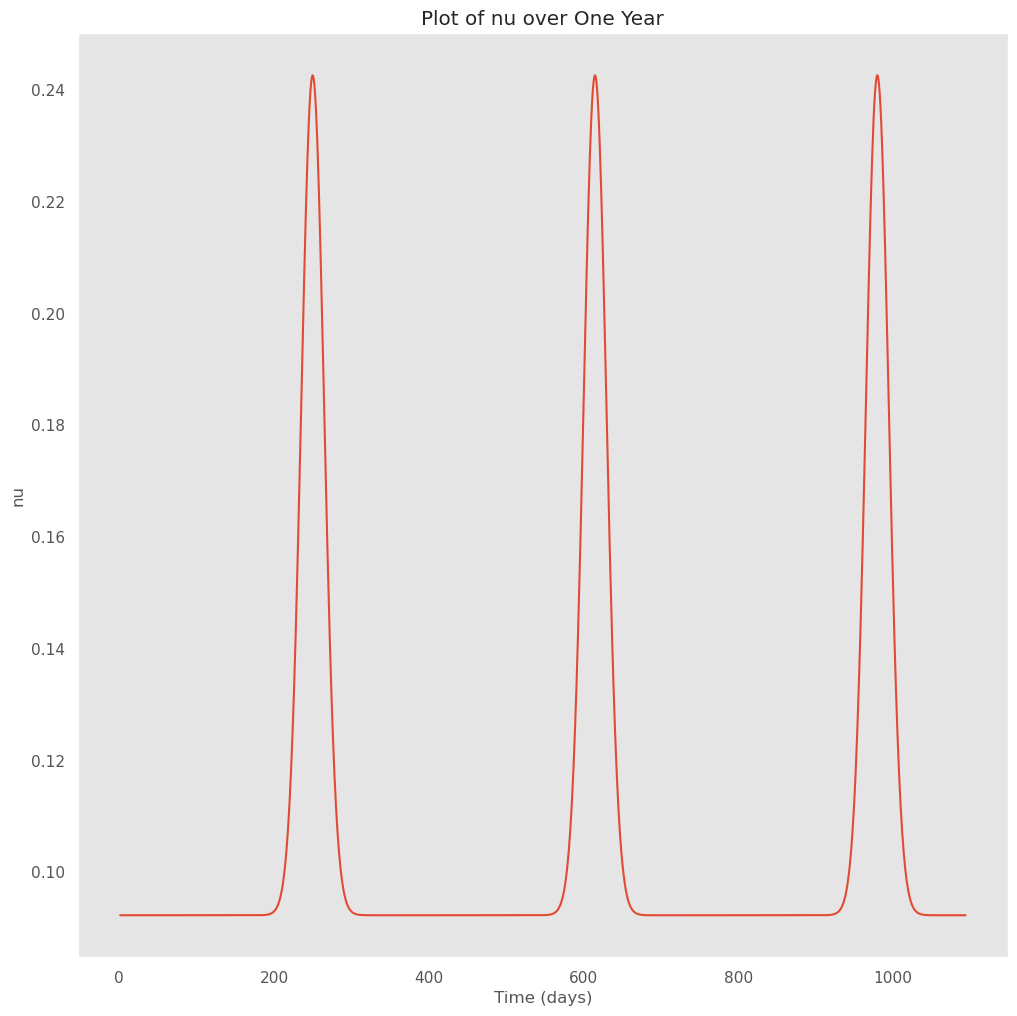

In [36]:
 nu =alpha0+k*np.exp(-s*(np.cos(np.pi*t/365 - varphi)**2))
# Plotting
plt.plot(t, nu)
plt.xlabel('Time (days)')
plt.ylabel('nu')
plt.title('Plot of nu over One Year')
plt.grid()
plt.show()